In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

## Neural Network model

#### Breast Cancer Wisconsin (Diagnostic) Data Set
#### source : https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data?resource=download


Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image

In [2]:
#reading the data
data =pd.read_csv("data.csv")
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,28.11,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,27.42,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,27.22,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,25.73,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,25.22,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [37]:
x = data.iloc[:,2:]
y = data.iloc[: , 1]

In [38]:
# noramlizing the data
scaler = preprocessing.StandardScaler().fit(x)
x = scaler.transform(x)

In [39]:
#Converting the lables B , M to a numerical value 
# B : 1 , M : 0

y_dummies = pd.get_dummies(data["diagnosis"])
df_two = pd.concat((y_dummies, y), axis=1)
df_two = df_two.drop(["diagnosis"], axis=1)
df_two = df_two.drop(["M"], axis=1)
result = df_two.rename(columns={"B": "Class"})
y = np.array(result)

In [40]:
#split the data to tain and test
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size = 0.8,random_state=1)

In [41]:
print(f"the shape of x is {x.shape}")
print(f"the shape of y is {y.shape}")

the shape of x is (569, 30)
the shape of y is (569, 1)


In [42]:
#viewing  a sample of data
for i in range(5):
    print(f"the {i} element is {x_train[i]} :and its label is {y_train[i]}")

the 0 element is [-0.63542262  0.31888999  1.06398269  0.95792475  0.51521779  0.4938569
  0.39297919  1.01424142  0.65856217 -0.29877563  0.17514754 -0.62332406
  0.09650165  0.20842046  0.06334293  0.12529659 -0.22559098  0.4872556
 -0.77518075 -0.173581    0.99623475 -0.04351564  0.91855914  0.82343597
  0.69398379  0.75850091  0.27783186  1.26066751  0.25762232  0.06008087] :and its label is [1]
the 1 element is [ 3.15048662 -1.15181643  1.77657315  1.82622928  0.28037183  0.53934045
  1.37101143  1.42849277 -0.00956047 -0.56244998  1.27054278 -0.7902437
  1.27318941  1.19035676  1.48306716 -0.04851988  0.82847078  1.14420474
 -0.36109227  0.49932813  1.29857524 -1.46677038  1.33853946  1.22072425
  0.22055617 -0.31339451  0.61317876  0.72925926 -0.86835298 -0.39709962] :and its label is [0]
the 2 element is [-0.30596615 -1.13785403 -1.46674322 -1.16206934 -1.87238279 -1.38688791
 -1.068658   -1.17226288 -0.08623028  0.78427387 -0.83218298  0.1599282
 -0.85247203 -0.67210997  0.116

### The model consest of four layes

#### The Input layer has 30 neurons
#### The hidden layer has 9 neurons and has a ReLu activation function
#### The hidden layer has 5 neurons and has a ReLu activation function
#### The output layer has 1 neurons and has a Sigmoid activation function

In [43]:
#building the model using tensor flow

model = Sequential(
    [               
        tf.keras.Input(shape=(30,)),    
        
        tf.keras.layers.Dense(9,activation = "relu"),
        tf.keras.layers.Dense(5,activation = "relu"),
        tf.keras.layers.Dense(1,activation = "sigmoid")
        
        
    ] 
)                            


In [44]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 9)                 279       
                                                                 
 dense_7 (Dense)             (None, 5)                 50        
                                                                 
 dense_8 (Dense)             (None, 1)                 6         
                                                                 
Total params: 335
Trainable params: 335
Non-trainable params: 0
_________________________________________________________________


In [58]:
#training the model
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.003),
    metrics=['accuracy']
)
history = model.fit(
    x_train,y_train,epochs = 500

)

Epoch 1/500
15/15 [==============================] - 0s 461us/step - loss: 5.5219e-04 - accuracy: 1.0000
Epoch 2/500
15/15 [==============================] - 0s 1ms/step - loss: 0.0040 - accuracy: 0.9978
Epoch 3/500
15/15 [==============================] - 0s 1ms/step - loss: 0.0057 - accuracy: 0.9978
Epoch 4/500
15/15 [==============================] - 0s 1ms/step - loss: 0.0018 - accuracy: 1.0000
Epoch 5/500
15/15 [==============================] - 0s 1ms/step - loss: 0.0028 - accuracy: 1.0000
Epoch 6/500
15/15 [==============================] - 0s 500us/step - loss: 2.8899e-04 - accuracy: 1.0000
Epoch 7/500
15/15 [==============================] - 0s 1ms/step - loss: 1.7746e-04 - accuracy: 1.0000
Epoch 8/500
15/15 [==============================] - 0s 1ms/step - loss: 1.5888e-04 - accuracy: 1.0000
Epoch 9/500
15/15 [==============================] - 0s 1ms/step - loss: 1.4128e-04 - accuracy: 1.0000
Epoch 10/500
15/15 [==============================] - 0s 2ms/step - loss: 1.2609e-04 

15/15 [==============================] - 0s 1ms/step - loss: 3.7550e-05 - accuracy: 1.0000
Epoch 157/500
15/15 [==============================] - 0s 1ms/step - loss: 3.7193e-05 - accuracy: 1.0000
Epoch 158/500
15/15 [==============================] - 0s 1ms/step - loss: 3.6756e-05 - accuracy: 1.0000
Epoch 159/500
15/15 [==============================] - 0s 229us/step - loss: 3.6687e-05 - accuracy: 1.0000
Epoch 160/500
15/15 [==============================] - 0s 1ms/step - loss: 3.6562e-05 - accuracy: 1.0000
Epoch 161/500
15/15 [==============================] - 0s 940us/step - loss: 3.7449e-05 - accuracy: 1.0000
Epoch 162/500
15/15 [==============================] - 0s 1ms/step - loss: 3.7358e-05 - accuracy: 1.0000
Epoch 163/500
15/15 [==============================] - 0s 1ms/step - loss: 3.5862e-05 - accuracy: 1.0000
Epoch 164/500
15/15 [==============================] - 0s 1ms/step - loss: 3.5857e-05 - accuracy: 1.0000
Epoch 165/500
15/15 [==============================] - 0s 1ms/ste

15/15 [==============================] - 0s 1ms/step - loss: 1.4716e-05 - accuracy: 1.0000
Epoch 311/500
15/15 [==============================] - 0s 1ms/step - loss: 1.4249e-05 - accuracy: 1.0000
Epoch 312/500
15/15 [==============================] - 0s 484us/step - loss: 1.3914e-05 - accuracy: 1.0000
Epoch 313/500
15/15 [==============================] - 0s 833us/step - loss: 1.4449e-05 - accuracy: 1.0000
Epoch 314/500
15/15 [==============================] - 0s 1ms/step - loss: 1.3990e-05 - accuracy: 1.0000
Epoch 315/500
15/15 [==============================] - 0s 906us/step - loss: 1.3697e-05 - accuracy: 1.0000
Epoch 316/500
15/15 [==============================] - 0s 643us/step - loss: 1.3652e-05 - accuracy: 1.0000
Epoch 317/500
15/15 [==============================] - 0s 468us/step - loss: 1.3317e-05 - accuracy: 1.0000
Epoch 318/500
15/15 [==============================] - 0s 1ms/step - loss: 1.3326e-05 - accuracy: 1.0000
Epoch 319/500
15/15 [==============================] - 0s 1

15/15 [==============================] - 0s 1ms/step - loss: 4.4736e-06 - accuracy: 1.0000
Epoch 465/500
15/15 [==============================] - 0s 1ms/step - loss: 4.3760e-06 - accuracy: 1.0000
Epoch 466/500
15/15 [==============================] - 0s 1ms/step - loss: 4.3952e-06 - accuracy: 1.0000
Epoch 467/500
15/15 [==============================] - 0s 466us/step - loss: 4.2660e-06 - accuracy: 1.0000
Epoch 468/500
15/15 [==============================] - 0s 1ms/step - loss: 4.2371e-06 - accuracy: 1.0000
Epoch 469/500
15/15 [==============================] - 0s 1ms/step - loss: 4.1631e-06 - accuracy: 1.0000
Epoch 470/500
15/15 [==============================] - 0s 660us/step - loss: 4.1436e-06 - accuracy: 1.0000
Epoch 471/500
15/15 [==============================] - 0s 1ms/step - loss: 4.0843e-06 - accuracy: 1.0000
Epoch 472/500
15/15 [==============================] - 0s 1ms/step - loss: 4.0965e-06 - accuracy: 1.0000
Epoch 473/500
15/15 [==============================] - 0s 1ms/ste

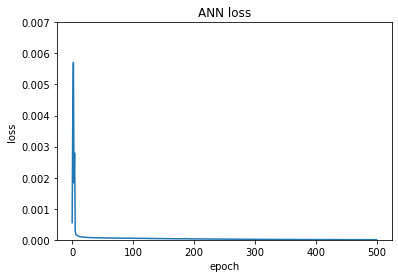

In [65]:
plt.plot(history.history['loss'])
plt.title('ANN loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.ylim(0, 0.007)
plt.show()

In [46]:
#the model prediction on the test cases
prediction = model.predict(x_test)
prediction

4/4 [==============================] - 0s 2ms/step


array([[9.9998719e-01],
       [3.2345925e-14],
       [9.9999994e-01],
       [9.9867004e-01],
       [1.0000000e+00],
       [1.5302287e-07],
       [1.9947685e-02],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.3826618e-12],
       [1.0000000e+00],
       [1.0000000e+00],
       [9.9999875e-01],
       [1.0000000e+00],
       [9.9939853e-01],
       [1.0000000e+00],
       [9.9999976e-01],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [2.8241584e-14],
       [1.0000000e+00],
       [1.0000000e+00],
       [2.0262833e-06],
       [1.0000000e+00],
       [9.9999982e-01],
       [9.9999988e-01],
       [1.0000000e+00],
       [2.0951235e-15],
       [1.0000000e+00],
       [1.0411489e-06],
       [9.9971759e-01],
       [9.9999976e-01],
       [1.1551290e-09],
       [8.1276569e-10],
       [4.9959486e-05],
       [1.0000000e+00],
       [3.332414

In [47]:
#comparing between the the model prediction and the real label
right = 0
j = 0
for i in prediction:
    if i >= 0.5:
        pred = 1
    else:
        pred = 0
    if y_test[j][0] == pred:
        right +=1
    print(f"for {j} th test the label is : {y_test[j][0]} and the predection of the model is: {pred}")
    j += 1    

for 0 th test the label is : 1 and the predection of the model is: 1
for 1 th test the label is : 0 and the predection of the model is: 0
for 2 th test the label is : 1 and the predection of the model is: 1
for 3 th test the label is : 1 and the predection of the model is: 1
for 4 th test the label is : 1 and the predection of the model is: 1
for 5 th test the label is : 1 and the predection of the model is: 0
for 6 th test the label is : 0 and the predection of the model is: 0
for 7 th test the label is : 1 and the predection of the model is: 1
for 8 th test the label is : 0 and the predection of the model is: 1
for 9 th test the label is : 1 and the predection of the model is: 1
for 10 th test the label is : 1 and the predection of the model is: 1
for 11 th test the label is : 1 and the predection of the model is: 1
for 12 th test the label is : 1 and the predection of the model is: 1
for 13 th test the label is : 0 and the predection of the model is: 0
for 14 th test the label is : 

In [49]:
row , col =  y_test.shape
accuracy = (right * 100) / row
accuracy

80.70175438596492